# Word frequencies and collocations

+ What is collocations?

    Collocation are two or more words that tends to apper frequently together for example "social media".
    
## Types of collocation 
1. Grammatical collocations 
2.  Semantics collocations
3. Compounds 
4. Flexible 

you can find details of the types in this [link](http://language.worldofcomputing.net/nlp-overview/collocations.html)

## Overview 
In this project we will be using NLTK "Brown" corpus

### Load (the Brown) corpus and  universal tagset
The tagset is used for part of speech tagging of words in the corpus.

In [2]:
import nltk

#get the corpus and tagset 
nltk.download('brown')
nltk.download('universal_tagset')

from nltk.corpus import brown

[nltk_data] Downloading package brown to C:\Users\John
[nltk_data]     Robert\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to C:\Users\John
[nltk_data]     Robert\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [5]:
#tag words in the corpus and display the first sentence
tagged_sentences = list(brown.tagged_sents(tagset='universal'))
print(tagged_sentences[0])

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]


### Count word frequencies

In [9]:
# count words and their frequencies
from collections import defaultdict
words = defaultdict(int)

for sentence in tagged_sentences:
    for word_pos_pair in sentence:
        word, pos = word_pos_pair
        words[word] += 1

Let us look at our counts:

In [23]:
# total number of unique words - type
print(len(words))

# how many words occur only once?
print(len([word for word in words if words[word] == 1]))

print(list(words.items())[:10])

print(words['day'])
print(words['night'])

print(words['Liverpool'])
print(words['Barcelona'])

56057
25559
[('The', 7258), ('Fulton', 17), ('County', 85), ('Grand', 18), ('Jury', 4), ('said', 1943), ('Friday', 60), ('an', 3542), ('investigation', 43), ('of', 36080)]
623
398
2
0


## Analyze the distribution of words

### Build and plot word rank

Assign each word a rank (according the sorting by its frequency).

In [27]:
# sort words according to their frequency
sorted_words = sorted(words, key=lambda word: words[word], reverse=True)

# print the 10 most frequent words
print(sorted_words[:10])

['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'that', 'is']


In [28]:
# assign each word a rank
word_ranks = {word: rank+1 for rank, word in enumerate(sorted_words)}

print(word_ranks['day'])
print(word_ranks['night'])

print(word_ranks['the'])
print(word_ranks['that'])

160
238
1
9


In [30]:
# now we assign each (word) rank the (word) frequency
frequency_ranks = {word_ranks[word]: frequency for word, frequency in words.items()}

print(list(frequency_ranks.items())[:10])

[(15, 7258), (5616, 17), (1281, 85), (5378, 18), (15174, 4), (60, 1943), (1853, 60), (35, 3542), (2587, 43), (4, 36080)]


In [32]:
# now we can plot the distribution
import matplotlib.pylab as plt
%matplotlib inline

lists = sorted(frequency_ranks.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples


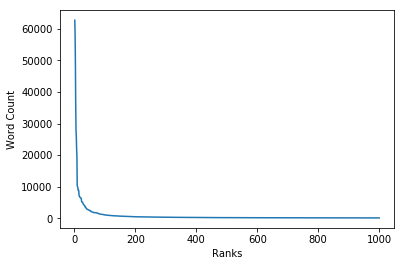

In [33]:
# plot for the first 1000 ranks
n_limit = 1000

plt.plot(x[:n_limit], y[:n_limit])
plt.xlabel("Ranks")
plt.ylabel("Word Count")
plt.show()

In [35]:
print(sum(words.values()))

1161192


## Plotting Zipfs Law

In [39]:
# Zipfs law: occurrence_probability(word) = c / rank(word)
#  inversely proportional (constant c)

# we also know:
#  occurrence_probability(word) = frequency(word)/num_all_words
#  e.g. when a word occurs 20 times in a corpus of 100 tokens, its o_p is 0.2

#  ->  frequency(word)/num_all_words = c / rank(word)
#  ->  rank(word) = c * num_all_words/frequency(word)

# for out plot:
#  ->  x = c * num_all_words/y
#  ->  for a given rank x: y = c * num_all_words/x

import numpy as np

# Create the vectors X and Y

c = 1

x_zipf = np.array(range(1, n_limit+1))
y_zipf = c * sum(words.values())/x_zipf

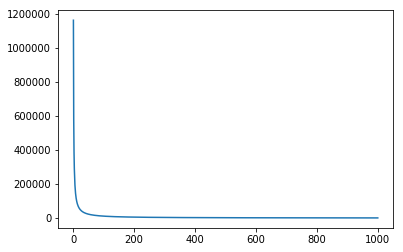

In [40]:
plt.plot(x_zipf, y_zipf)
plt.show()

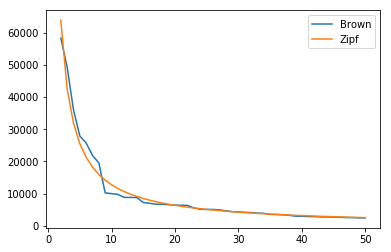

In [41]:
# now let us plot Zipf and our corpus based data together

n_minimum = 1
n_limit = 50

c = 0.11

# plot our data
plt.plot(x[n_minimum:n_limit], y[n_minimum:n_limit], label='Brown')

# plot Zipf
x_zipf = np.array(range(n_minimum + 1, n_limit + 1))
y_zipf = c * sum(words.values())/x_zipf
plt.plot(x_zipf, y_zipf, label='Zipf')

plt.legend()
plt.show()

# Collocations

-> a pair or group of words that are habitually juxtaposed.

## Co-occuring word pairs

We only have the frequencies of individual words so far.

To compute collocation measure we need frequencies of co-occurring word pairs.

In [42]:
# count frequencies of word pairs in our corpus
all_word_pairs = defaultdict(int)

for sentence in tagged_sentences:
    for index, word_pos_pair in enumerate(sentence):
        word, pos = word_pos_pair
        # get second word to extract co-occurring word pair
        try:
            other_word, other_word_pos = sentence[index + 1]
            all_word_pairs[(word, other_word)] += 1
        except IndexError:
            pass

In [45]:
# let us look at the word pairs
print(sorted(all_word_pairs.items(), key=lambda pair: pair[1], reverse=True)[:10])

print(len(all_word_pairs))

print(len([pair for pair, frequency in all_word_pairs.items() if frequency > 1]))

[(('of', 'the'), 9625), ((',', 'and'), 6288), (('in', 'the'), 5546), ((',', 'the'), 3753), (('to', 'the'), 3426), (("''", '.'), 3331), ((';', ';'), 2783), (('?', '?'), 2346), (('on', 'the'), 2297), (('and', 'the'), 2136)]
447224
112106


In [46]:
for sentence in tagged_sentences:
    for index, word_pos_pair in enumerate(sentence):
        word, pos = word_pos_pair
        # get second word to extract co-occurring word pair
        try:
            other_word, other_word_pos = sentence[index + 1]
            if (word, other_word) == ('?', '?'):
                print(sentence)
                break
        except IndexError:
            pass

[('Judge', 'NOUN'), ('Parsons', 'NOUN'), ('leaned', 'VERB'), ('over', 'ADP'), ('the', 'DET'), ('bench', 'NOUN'), ('and', 'CONJ'), ('inquired', 'VERB'), (',', '.'), ('``', '.'), ('You', 'PRON'), ('mean', 'VERB'), ('some', 'DET'), ('of', 'ADP'), ('the', 'DET'), ('defendants', 'NOUN'), ('made', 'VERB'), ('statements', 'NOUN'), ('admitting', 'VERB'), ('this', 'DET'), ("''", '.'), ('?', '.'), ('?', '.')]
[('How', 'ADV'), ('effective', 'ADJ'), ('have', 'VERB'), ('Kennedy', 'NOUN'), ('administration', 'NOUN'), ('first', 'ADJ'), ('foreign', 'ADJ'), ('policy', 'NOUN'), ('decisions', 'NOUN'), ('been', 'VERB'), ('in', 'ADP'), ('dealing', 'VERB'), ('with', 'ADP'), ('Communist', 'NOUN'), ('aggression', 'NOUN'), ('?', '.'), ('?', '.')]
[('``', '.'), ('How', 'ADV'), ('can', 'VERB'), ('a', 'DET'), ('man', 'NOUN'), ('with', 'ADP'), ('any', 'DET'), ('degree', 'NOUN'), ('of', 'ADP'), ('common', 'ADJ'), ('decency', 'NOUN'), ('charge', 'VERB'), ('this', 'DET'), ("''", '.'), ('?', '.'), ('?', '.')]
[('``', 

[('Night', 'NOUN'), ('scenes', 'NOUN'), ('will', 'VERB'), ('add', 'VERB'), ('an', 'DET'), ('exciting', 'ADJ'), ('touch', 'NOUN'), ('to', 'ADP'), ('your', 'DET'), ('vacation', 'NOUN'), ('travelogue', 'NOUN'), ('and', 'CONJ'), ('what', 'DET'), ('better', 'ADJ'), ('place', 'NOUN'), ('to', 'PRT'), ('take', 'VERB'), ('them', 'PRON'), ('then', 'ADV'), ('along', 'ADP'), ("Chicago's", 'NOUN'), ('Lake', 'NOUN'), ('Shore', 'NOUN'), ('Drive', 'NOUN'), ('?', '.'), ('?', '.')]
[('How', 'ADV'), ('are', 'VERB'), ('the', 'DET'), ('roads', 'NOUN'), (',', '.'), ('and', 'CONJ'), ('how', 'ADV'), ('will', 'VERB'), ('they', 'PRON'), ('stand', 'VERB'), ('up', 'PRT'), ('?', '.'), ('?', '.')]
[('swampy', 'ADJ'), ('areas', 'NOUN'), ('or', 'CONJ'), ('intermittent', 'ADJ'), ('springs', 'NOUN'), ('?', '.'), ('?', '.')]
[('Will', 'VERB'), ('the', 'DET'), ('view', 'NOUN'), ('be', 'VERB'), ('something', 'NOUN'), ('you', 'PRON'), ('can', 'VERB'), ('live', 'VERB'), ('with', 'ADP'), ('?', '.'), ('?', '.')]
[('Had', 'VER

[('What', 'DET'), ('can', 'VERB'), ('we', 'PRON'), ('do', 'VERB'), ('with', 'ADP'), ('the', 'DET'), ('general', 'ADJ'), ('T', 'NOUN'), ('?', '.'), ('?', '.')]
[('If', 'ADP'), ('the', 'DET'), ('direct-sum', 'NOUN'), ('decomposition', 'NOUN'), ('(', '.'), ('A', 'DET'), (')', '.'), ('is', 'VERB'), ('valid', 'ADJ'), (',', '.'), ('how', 'ADV'), ('can', 'VERB'), ('we', 'PRON'), ('get', 'VERB'), ('hold', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('projections', 'NOUN'), ('Af', 'NOUN'), ('associated', 'VERB'), ('with', 'ADP'), ('the', 'DET'), ('decomposition', 'NOUN'), ('?', '.'), ('?', '.')]
[('What', 'DET'), ('can', 'VERB'), ('we', 'PRON'), ('say', 'VERB'), ('of', 'ADP'), ('the', 'DET'), ('probabilities', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('different', 'ADJ'), ('possible', 'ADJ'), ('numbers', 'NOUN'), ('of', 'ADP'), ("bull's-eyes", 'NOUN'), ('?', '.'), ('?', '.')]
[('What', 'DET'), ('probabilities', 'NOUN'), ('should', 'VERB'), ('be', 'VERB'), ('attached', 'VERB'), ('to', 'ADP'), ('these

[('Suppose', 'VERB'), ('the', 'DET'), ('cops', 'NOUN'), ('somehow', 'ADV'), ('got', 'VERB'), ('hold', 'NOUN'), ('of', 'ADP'), ('that', 'DET'), ('?', '.'), ('?', '.')]
[('What', 'DET'), ('was', 'VERB'), ('that', 'DET'), ('old', 'ADJ'), ('sign', 'NOUN'), (',', '.'), ('supposed', 'VERB'), ('to', 'PRT'), ('be', 'VERB'), ('painted', 'VERB'), ('over', 'ADP'), ('a', 'DET'), ('door', 'NOUN'), ('somewhere', 'ADV'), (',', '.'), ('Abandon', 'VERB'), ('hope', 'NOUN'), (',', '.'), ('all', 'PRT'), ('ye', 'PRON'), ('who', 'PRON'), ('enter', 'VERB'), ('here', 'ADV'), ('?', '.'), ('?', '.')]
[('``', '.'), ("Didn't", 'VERB'), ('you', 'PRON'), ('have', 'VERB'), ('an', 'DET'), ('old', 'ADJ'), ('pair', 'NOUN'), ('of', 'ADP'), ('painting', 'VERB'), ('overalls', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('garage', 'NOUN'), ('?', '.'), ('?', '.')]
[('``', '.'), ('Green', 'ADJ'), ('paint', 'NOUN'), (',', '.'), ("wasn't", 'VERB'), ('it', 'PRON'), ('?', '.'), ('?', '.')]
[('A', 'DET'), ('man', 'NOUN'), ('with', 'A

[('``', '.'), ('Can', 'VERB'), ('I', 'PRON'), ('ride', 'VERB'), ('around', 'ADP'), ('with', 'ADP'), ('you', 'PRON'), ("''", '.'), ('?', '.'), ('?', '.')]
[('``', '.'), ('Did', 'VERB'), ('you', 'PRON'), ('do', 'VERB'), ('that', 'DET'), ("''", '.'), ('?', '.'), ('?', '.')]
[('``', '.'), ('Why', 'ADV'), ('did', 'VERB'), ('you', 'PRON'), ('kill', 'VERB'), ('it', 'PRON'), ("''", '.'), ('?', '.'), ('?', '.')]
[("Didn't", 'VERB'), ('you', 'PRON'), ('see', 'VERB'), ('how', 'ADV'), ('beautiful', 'ADJ'), ('it', 'PRON'), ('was', 'VERB'), ("''", '.'), ('?', '.'), ('?', '.')]
[('``', '.'), ('You', 'PRON'), ('saw', 'VERB'), ('the', 'DET'), ('colors', 'NOUN'), ('of', 'ADP'), ('it', 'PRON'), (',', '.'), ("didn't", 'VERB'), ('you', 'PRON'), ('?', '.'), ('?', '.')]
[('Have', 'VERB'), ('you', 'PRON'), ('ever', 'ADV'), ('seen', 'VERB'), ('anything', 'NOUN'), ('like', 'ADP'), ('it', 'PRON'), ('around', 'ADP'), ('here', 'ADV'), ("''", '.'), ('?', '.'), ('?', '.')]
[('``', '.'), ("It's", 'PRT'), ('a', 'DET')

In [59]:
# to make it computationally feasible, only analyze word pairs with freq > some threshold
threshold = 15
word_pairs = {word_pair: frequency for word_pair, frequency in all_word_pairs.items() if frequency > threshold}
print(len(word_pairs))

6589


In [58]:
print(list(word_pairs.items())[:10])

[(("''", 'that'), 16), (('that', 'any'), 31), (('took', 'place'), 18), (('place', '.'), 55), (('said', 'in'), 26), (('that', 'the'), 1368), (('the', 'City'), 19), (('Committee', ','), 19), ((',', 'which'), 660), (('which', 'had'), 102)]


## Collocation measures

Above we actually used the most basic collocation measure: the frequency (O11) of the co-occurring word pair.

In [60]:
# compute the contingency table for all co-occuring word pairs
o11 = word_pairs
o12 = defaultdict(int)
o21 = defaultdict(int)
o22 = defaultdict(int)

for word_pair in word_pairs:
    word1, word2 = word_pair
    for other_word_pair in word_pairs:
        other_word1, other_word2 = other_word_pair
        if word1 == other_word1:
            if word2 != other_word2:
                o12[word_pair] += word_pairs[other_word_pair]
            else:
                # we already have this case in word_pairs
                pass
        else:
            if word2 == other_word2:
                o21[word_pair] += word_pairs[other_word_pair]
            else:
                o22[word_pair] += word_pairs[other_word_pair]

# set min value to 1
for pair in word_pair:
    for cell in (o12, o21, o22):
        if not cell[word_pair]:
            cell[word_pair] = 1

contingency_tables = {'o11': o11, 'o12': o12, 'o21': o21, 'o22': o22}

In [63]:
# print highest ranked collocations, using given collocation measure to compute ranking
def print_highest_ranked_collocations(measure, top=10, tables=contingency_tables):
    for pair in sorted(tables['o11'], key=lambda word_pair: measure(word_pair, tables), reverse=True)[:top]:
        print(pair, tables['o11'][pair])

In [64]:
import math

# mutual information
def mi(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_C1 = pair_o11 + pair_o21
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    return math.log(pair_o11/pair_e11)

print_highest_ranked_collocations(mi, top=20)

('six', 'months') 16
('National', 'Forest') 16
('radio', 'emission') 16
('pulmonary', 'artery') 16
('sweet', 'clover') 16
('minimal', 'polynomial') 16
('East', 'Greenwich') 17
('private', 'detective') 17
('basic', 'wage') 17
('electronic', 'switches') 17
('Linda', 'Kay') 17
('High', 'School') 18
('Roman', 'Catholic') 18
('Mary', 'Jane') 18
('carbon', 'tetrachloride') 18
('anode', 'holder') 19
('Miss', 'Langford') 18
('Puerto', 'Rico') 21
('Lo', 'Shu') 21
('Mrs.', 'Coolidge') 21


In [65]:
# distribution of co-occurring word pairs
# 1. sort word pairs by their frequency:
sorted_all_word_pairs = sorted(all_word_pairs, key=lambda pair: all_word_pairs[pair], reverse=True)
# print sorted_all_word_pairs[:5]

# 2. assign word pairs their rank in the frequency order
ranked_all_word_pairs = {word_pair: rank + 1 for rank, word_pair in enumerate(sorted_all_word_pairs)}
# print ranked_all_word_pairs.items()[:5]

# 3. map ranks to the corresponding frequency
rank_frequency_word_pairs = {rank: all_word_pairs[word_pair] for word_pair, rank in ranked_all_word_pairs.items()}
# print rank_frequency_word_pairs.items()[:5]

# prepare values to plot
lists_pairs = sorted(rank_frequency_word_pairs.items()) # sorted by key, return a list of tuples
x_pairs, y_pairs = zip(*lists_pairs) # unpack a list of pairs into two tuples

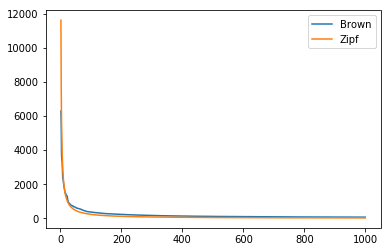

In [66]:
# plot the distribution of word pairs and Zipf's law formula
n_minimum = 1
n_limit = 1000

c = 0.02

# plot our data
plt.plot(x_pairs[n_minimum:n_limit], y_pairs[n_minimum:n_limit], label='Brown')

# plot Zipf
x_zipf = np.array(range(n_minimum + 1, n_limit + 1))
y_zipf = c * sum(words.values())/x_zipf
plt.plot(x_zipf, y_zipf, label='Zipf')

plt.legend()
plt.show()

In [67]:
def z_score(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    pair_o12 = tables['o12'][word_pair]
    pair_o21 = tables['o21'][word_pair]
    pair_o22 = tables['o22'][word_pair]
    
    pair_R1 = pair_o11 + pair_o12
    pair_C1 = pair_o11 + pair_o21
    pair_N = pair_o11 + pair_o12 + pair_o21 + pair_o22
    pair_e11 = pair_R1 * pair_C1 / float(pair_N)
    
    return (pair_o11 - pair_e11) / math.sqrt(pair_e11)

print_highest_ranked_collocations(z_score, top=20)

('six', 'months') 16
('National', 'Forest') 16
('radio', 'emission') 16
('pulmonary', 'artery') 16
('sweet', 'clover') 16
('minimal', 'polynomial') 16
('East', 'Greenwich') 17
('private', 'detective') 17
('basic', 'wage') 17
('electronic', 'switches') 17
('Linda', 'Kay') 17
('High', 'School') 18
('Roman', 'Catholic') 18
('Mary', 'Jane') 18
('carbon', 'tetrachloride') 18
('anode', 'holder') 19
('Puerto', 'Rico') 21
('Lo', 'Shu') 21
('Mrs.', 'Coolidge') 21
('Armed', 'Forces') 22


In [68]:
def frequency(word_pair, tables):
    pair_o11 = tables['o11'][word_pair]
    return pair_o11

print_highest_ranked_collocations(frequency, top=20)

('of', 'the') 9625
(',', 'and') 6288
('in', 'the') 5546
(',', 'the') 3753
('to', 'the') 3426
("''", '.') 3331
(';', ';') 2783
('?', '?') 2346
('on', 'the') 2297
('and', 'the') 2136
("''", ',') 2032
(',', 'but') 1856
('for', 'the') 1759
('to', 'be') 1697
('at', 'the') 1506
(',', 'he') 1489
('with', 'the') 1472
('of', 'a') 1461
('that', 'the') 1368
('from', 'the') 1351


# Exercises

### Zipf's law

1. Find a more suited constant c so Zipf's law matches better to our data (you might want to modify n_minimum and n_limit to get a nicer looking plot).
2. Does the distribution of co-occurring word pairs also follow Zipf's law?

### Collocation measures

3. What are issues when using just the frequency of word pairs as collocation measure?
4. Implement other collocation measures (http://collocations.de/AM/index.html). Are there differnt top ranked collocations?
5. Define co-occurrence differently: not only adjacent words, but consider for example occuring in a sentence together as a case of co-occurrence. Recompute the contingency tables (you might have to modify the threshold, we cannot run these scripts with too many word pairs here) and apply the collocation measures again.

6. Do everything with POS-tags instead of words. Does the distribution of POS-tags also follow Zipf's law? What are the collocations for POS-tags?